In [20]:
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

# Introduction
This project is an overview, description, and analysis of three datasets collected from the Sean Lahman Baseball Database. The goals of this analysis is broken down into three parts, each one getting more specific than the next. The first goal is to view the relationship between the amount of money spent by professional baseball teams and the amount of games the teams have won (W). The second goal is to compare a set of pitchers' Earned Run Average (ERA) and/or Strikeouts (SO) to the same set of pitchers' wins (W). This comparison is meant to test whether or not wins is indicative of how well a pitcher is performing. Once a relationship is evaluated, the third goal is to run analysis of the relationship between a set of pitchers wins compared to their salary. All of this analysis is done based on the 2016 Major League Baseball (MLB). 

# Data
The three datasets I will be using for this particular project are laid out below. Here you can find the links to all of the data I used for this project (http://seanlahman.com/baseball-archive/statistics). The "salaries" dataset consists of 5 columns of data, but we will be focusing on only the "salary", "teamID", "playerID", and "pos"(position) columns for this analysis. The second dataset, "teams", is comprised of 48 columns, but for this analysis, only the "teamID" and "W" columns will be used. Lastly, the "pitchers" dataset is made uo of 30 columns; however, the important columns for this analysis are the "playerID", "W", "SO", "ERA", and "GS" (Games Started) columns. Below are histograms for each column comprised of numerical data as to describe the normality of the datasets of each column. 

In [21]:
salaries = pd.read_csv('Salaries 2016.csv')
pitchers = pd.read_csv('Pitching 2016.csv')
teams = pd.read_csv('Teams 2016.csv')

(array([ 557.,  115.,   60.,   44.,   24.,   19.,   21.,    7.,    3.,    3.]),
 array([   507500.,   3756750.,   7006000.,  10255250.,  13504500.,
         16753750.,  20003000.,  23252250.,  26501500.,  29750750.,
         33000000.]),
 <a list of 10 Patch objects>)

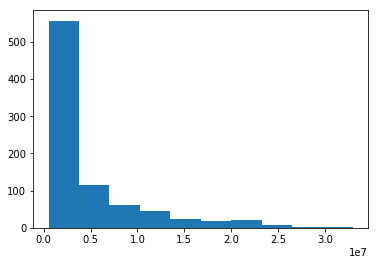

In [22]:
salaries = salaries[salaries.playerID != 'NaN']
top_salaries = salaries.drop(salaries.index[852:854])
top_salaries = top_salaries[['salary', 'teamID', 'playerID', 'pos']]
plt.hist(top_salaries['salary'])

Above, we see the data for the players’ salaries for 2016 season. As we can see, the data has a right skew with most of the players being grouped towards the lesser dollar amount of pay.  

(array([ 12.,  31.,  30.,  26.,  32.,  25.,  10.,  10.,   4.,   3.]),
 array([  0. ,   2.2,   4.4,   6.6,   8.8,  11. ,  13.2,  15.4,  17.6,
         19.8,  22. ]),
 <a list of 10 Patch objects>)

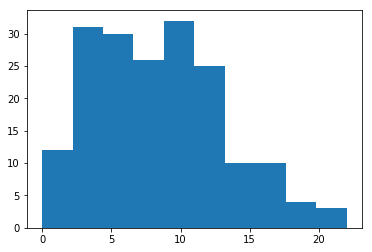

In [23]:
pitchers = pitchers[['playerID' ,'W', 'SO', 'ERA', 'GS']]
pitchers = pitchers[pitchers.GS > 9]
pitchers = pitchers.drop_duplicates(subset='playerID', keep="last")
plt.hist(pitchers['W'])

Here, we have a near normal distribution of the pitchers wins in 2016. A slight skew to the right, but a near normal dataset. 

(array([  4.,  22.,  48.,  46.,  36.,  20.,   3.,   2.,   1.,   1.]),
 array([ 1.69 ,  2.457,  3.224,  3.991,  4.758,  5.525,  6.292,  7.059,
         7.826,  8.593,  9.36 ]),
 <a list of 10 Patch objects>)

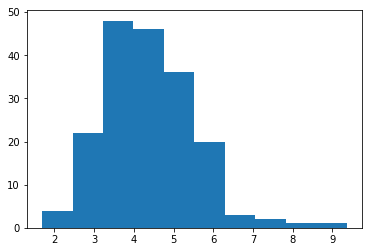

In [24]:
plt.hist(pitchers['ERA'])

Above is a histogram of the ERA for the 2016 season. This histogram above is another near normal distribution with a right skew. 

(array([ 22.,  32.,  28.,  28.,  28.,  25.,   9.,   5.,   5.,   1.]),
 array([  27. ,   52.7,   78.4,  104.1,  129.8,  155.5,  181.2,  206.9,
         232.6,  258.3,  284. ]),
 <a list of 10 Patch objects>)

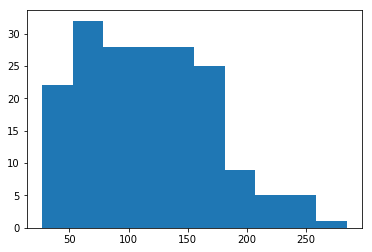

In [25]:
plt.hist(pitchers['SO'])

Strikeouts is the next histogram we see. This data has a skew to the right as well. 

(array([ 1.,  0.,  7.,  3.,  3.,  3.,  7.,  3.,  2.,  1.]),
 array([  59. ,   63.4,   67.8,   72.2,   76.6,   81. ,   85.4,   89.8,
          94.2,   98.6,  103. ]),
 <a list of 10 Patch objects>)

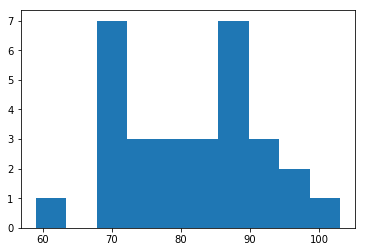

In [26]:
team_wins = teams[['teamID', 'W']]
team_wins = team_wins.groupby('teamID')
wins_totals = team_wins.sum()
wins_totals.sort_values('W', ascending=False)
plt.hist(wins_totals['W'])

This last histogram is of the team wins in 2016. It has a bit of a bimodal or double peaking look to it. 

# What is the relationship between a teams total wins and total salaries paid? Do they affect each other? If so, how?

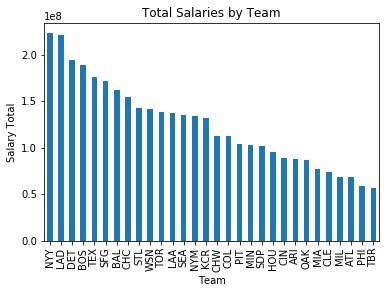

In [27]:
team_salaries = top_salaries[['teamID', 'salary']]
team_salaries = team_salaries.groupby('teamID')
team_totals = team_salaries.sum()
team_totals.sort_values('salary', ascending=False)
team_plot = team_totals.sort_values('salary',ascending=False).plot(kind='bar', legend=None, title="Total Salaries by Team")
team_plot.set_xlabel("Team")
team_plot.set_ylabel("Salary Total")

Here is the total amount of salaries paid to both batters and pitchers of each team. This gives us an idea of which teams are spending the most money paying their players and which are spending the least. At a glance, we can see the top spenders are NYY, LAD, DET, BOS, and TEX.

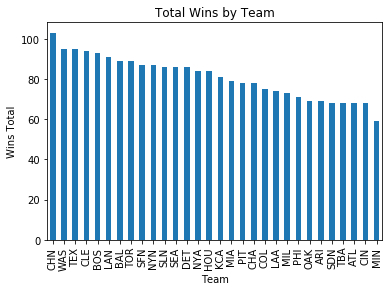

In [28]:
team_wins = teams[['teamID', 'W']]
team_wins = team_wins.groupby('teamID')
wins_totals = team_wins.sum()
wins_totals.sort_values('W', ascending=False)
wins_plot = wins_totals.sort_values('W',ascending=False).plot(kind='bar', legend=None, title="Total Wins by Team")
plt.figure(figsize=(10, 5))
wins_plot.set_xlabel("Team")
wins_plot.set_ylabel("Wins Total")

Here is the total amount of wins for each team. Again, this gives us a visual of how many games each team won in 2016. The top winners are CHN, WAS, TEX, CLE, BOS. Only two of the top five spenders making the cut. Even CLE being the fifth least spender had the fourth most wins. So just looking over this briefly, one can see that there are discrepancies in the teams spending the most money and teams winning the most games; however, we need to dive deeper for further analysis.

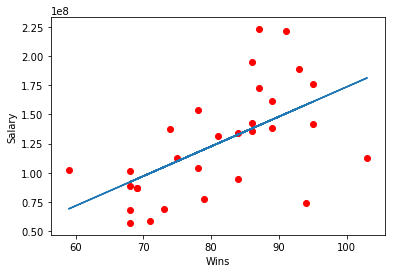

In [29]:
teams2 = teams.sort_values(['teamID'])
(m1, b1) = np.polyfit(teams2['W'], team_totals['salary'], 1)
yp = m1 * teams2['W'] +b1 
plt.plot(teams2['W'], yp)
plt.scatter(x = teams2['W'], y = team_totals['salary'], color='red')
plt.xlabel('Wins')
plt.ylabel('Salary')

In [30]:
pearsonr(teams2['W'], team_totals['salary'])

(0.58343000515817534, 0.00071415675730728998)

Above is a scatter plot analyzing each teams’ wins based on how much money each team is spending on salary. Below is a calculation of the correlation coefficient. Just by look at the graph and this calculation, we can see there is a positive relationship between the two variables; however, maybe not as much as we would expect. This conclusion may beg the question: "Why are these teams spending so much money"?

# Is ERA and Strikeouts predicitve of pitcher sucess?

Moving on to our second goal of the analysis, we will be moving deeper in the data to analyze individual player performances based on wins. For this analysis, the pitching category was chosen. Specifically, the pitchers with 10 or more games started. We've filtered out the other pitchers to make sure there is enough data on each pitcher to make them statistically significant. Here we will run ERA and SO against W as to determine if the amount of wins a pitcher has is indicative of how well the pitcher is performing.

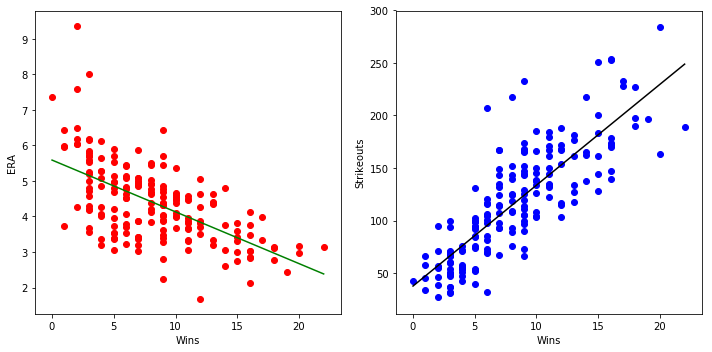

In [31]:
pitchers = pitchers[['playerID' ,'W', 'SO', 'ERA', 'GS']]
pitchers = pitchers[pitchers.GS > 9]
pitchers.sort_values('GS', ascending=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
(m2, b2) = np.polyfit(pitchers['W'], pitchers['ERA'], 1)
yp2 = m2 * pitchers['W'] +b2 
plt.plot(pitchers['W'], yp2, color='green')
plt.scatter(x = pitchers['W'], y = pitchers['ERA'], color='red')
plt.xlabel('Wins')
plt.ylabel('ERA')

plt.subplot(1, 2, 2)
(m3, b3) = np.polyfit(pitchers['W'], pitchers['SO'], 1)
yp3 = m3 * pitchers['W'] +b3 
plt.plot(pitchers['W'], yp3, color='black')
plt.scatter(x = pitchers['W'], y = pitchers['SO'], color='blue')
plt.xlabel('Wins')
plt.ylabel('Strikeouts')

plt.tight_layout()
plt.show()

These two scatter plots show the relationship between the ERA vs. wins and strikeouts vs. wins. We have chosen these to statistics because they are the most indicative of how well a pitcher is performing. On the left, we can see there is a bit of correlation between ERA and wins. We can see a few outliers here, but for the most part the graph seems to be telling a story of a negative correlation. On the right, we have what seems to be a strong correlation between strikeouts and wins. Tightly grouped with a positive correlation.

In [32]:
pearsonr(pitchers['W'], pitchers['ERA'])

(-0.59993405301064018, 2.8472179188643593e-19)

In [33]:
pearsonr(pitchers['W'], pitchers['SO'])

(0.81937250298411801, 1.3173839140071877e-45)

Looking at the calculations of the correlation coefficients, we can see what we suspected above. A slight negative correlation between ERA and wins, and a strong positive correlation between strikeouts and wins. Since we have established a correlation between a pitcher’s performance on the field and their wins, we can move on the the final goal of analyzing their salaries against their wins.

# Since wins is predicitive of pitcher success on the field, is there a relationship between wins and a pitcher's salary? Do they influence each other? If so, how?

In [34]:
pitchers_list = set(pitchers['playerID']).intersection(salaries['playerID'])
pitchers2 = pitchers[(pitchers['playerID'].isin([
        'wachami01', 'tillmch01', 'colege01', 'shielja02', 'gonzagi01', 'anderch01', 'scherma01', 'sanchaa01', 'walketa01', 'mileywa01', 'roarkta01', 'priceda01', 'lockeje01', 'greinza01', 'gausmke01', 'harvema01', 'liriafr01', 'syndeno01', 'hugheph01', 'vogelry01', 'archech01', 'samarje01', 'wainwad01', 'darviyu01', 'eickhje01', 'hammeja01', 'perdolu02', 'eovalna01', 'peralwi01', 'fistedo01', 'corbipa01', 'rodried05', 'wrighst01', 'rodonca01', 'colonba01', 'hellije01', 'pelfrmi01', 'quintjo01', 'bauertr01', 'smylydr01', 'bundydy01', 'cuetojo01', 'peavyja01', 'weaveje02', 'youngch03', 'mchugco01', 'wislema01', 'lambjo02', 'rossjo01', 'severlu01', 'garcija02', 'jacksed01', 'chatwty01', 'duffyda01', 'maedake01', 'millesh01', 'stromma01', 'carraca01', 'cashnan01', 'nolasri01', 'norrida01', 'bettich01', 'woodal02', 'moorema02', 'mcculla02', 'ventuyo01', 'estrama01', 'lewisco01', 'grayjo02', 'porceri01', 'salech01', 'milonto01', 'graveke01', 'desclan01', 'straida01', 'tanakma01', 'bumgama01', 'verrelo01', 'verlaju01', 'novaiv01', 'karnsna01', 'kershcl01', 'happja01', 'kazmisc01', 'velasvi01', 'stripro01', 'keuchda01', 'norribu01', 'anderty01', 'arrieja01', 'delarru01', 'fernajo02', 'pinedmi01', 'iwakuhi01', 'simonal01', 'grayso01', 'finnebr01', 'hendrky01', 'garzama01', 'hernafe02', 'odorija01', 'buchhcl01', 'niesejo01', 'teherju01', 'wilsoty01', 'martica04', 'chenwe02', 'sabatcc01', 'tomlijo01', 'hillri01', 'koehlto01', 'fiersmi01', 'strasst01', 'lestejo01', 'perezwi01', 'cainma01', 'pomerdr01', 'klubeco01', 'zimmejo02', 'sanchan01', 'lackejo01', 'volqued01', 'nolaaa01', 'gibsoky01', 'santihe01', 'matzst01', 'wrighmi01', 'rayro02', 'nelsoji02', 'kenneia01', 'hamelco01', 'salazda01', 'jimenub01', 'nicasju01', 'degroja01', 'leakemi01', 'gallayo01', 'geedi01', 'conlead01', 'perezma02', 'reaco01', 'shoemma01', 'santaer01']))
                    ]
pitchers2 = pitchers2.sort_values(['playerID'])
pitchers_sal = salaries[(salaries['playerID'].isin([
        'wachami01', 'tillmch01', 'colege01', 'shielja02', 'gonzagi01', 'anderch01', 'scherma01', 'sanchaa01', 'walketa01', 'mileywa01', 'roarkta01', 'priceda01', 'lockeje01', 'greinza01', 'gausmke01', 'harvema01', 'liriafr01', 'syndeno01', 'hugheph01', 'vogelry01', 'archech01', 'samarje01', 'wainwad01', 'darviyu01', 'eickhje01', 'hammeja01', 'perdolu02', 'eovalna01', 'peralwi01', 'fistedo01', 'corbipa01', 'rodried05', 'wrighst01', 'rodonca01', 'colonba01', 'hellije01', 'pelfrmi01', 'quintjo01', 'bauertr01', 'smylydr01', 'bundydy01', 'cuetojo01', 'peavyja01', 'weaveje02', 'youngch03', 'mchugco01', 'wislema01', 'lambjo02', 'rossjo01', 'severlu01', 'garcija02', 'jacksed01', 'chatwty01', 'duffyda01', 'maedake01', 'millesh01', 'stromma01', 'carraca01', 'cashnan01', 'nolasri01', 'norrida01', 'bettich01', 'woodal02', 'moorema02', 'mcculla02', 'ventuyo01', 'estrama01', 'lewisco01', 'grayjo02', 'porceri01', 'salech01', 'milonto01', 'graveke01', 'desclan01', 'straida01', 'tanakma01', 'bumgama01', 'verrelo01', 'verlaju01', 'novaiv01', 'karnsna01', 'kershcl01', 'happja01', 'kazmisc01', 'velasvi01', 'stripro01', 'keuchda01', 'norribu01', 'anderty01', 'arrieja01', 'delarru01', 'fernajo02', 'pinedmi01', 'iwakuhi01', 'simonal01', 'grayso01', 'finnebr01', 'hendrky01', 'garzama01', 'hernafe02', 'odorija01', 'buchhcl01', 'niesejo01', 'teherju01', 'wilsoty01', 'martica04', 'chenwe02', 'sabatcc01', 'tomlijo01', 'hillri01', 'koehlto01', 'fiersmi01', 'strasst01', 'lestejo01', 'perezwi01', 'cainma01', 'pomerdr01', 'klubeco01', 'zimmejo02', 'sanchan01', 'lackejo01', 'volqued01', 'nolaaa01', 'gibsoky01', 'santihe01', 'matzst01', 'wrighmi01', 'rayro02', 'nelsoji02', 'kenneia01', 'hamelco01', 'salazda01', 'jimenub01', 'nicasju01', 'degroja01', 'leakemi01', 'gallayo01', 'geedi01', 'conlead01', 'perezma02', 'reaco01', 'shoemma01', 'santaer01']))
                       ]
pitchers_sal = pitchers_sal.sort_values(['playerID'])

   Since not all the pitchers on the "pitchers" dataset (with 10 or more GS) matched up with the pitchers on the "salaries" dataset, we must only analyze the ones that do match up as to make our analysis accurate. This is what we have done above. 

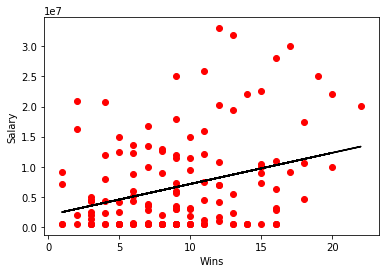

In [35]:
(m4, b4) = np.polyfit(pitchers2['W'], pitchers_sal['salary'], 1)
yp4 = m4 * pitchers2['W'] +b4 
plt.plot(pitchers2['W'], yp4, color='black')
plt.scatter(x = pitchers2['W'], y = pitchers_sal['salary'], color='red')
plt.xlabel('Wins')
plt.ylabel('Salary')

Here is another scatter plot, this time to view the relationship between a pitchers salary and their wins. Just looking at the scatter plot, we can see that the relationship is not very strong at all. We can see a large amount of players below the 1 million dollar mark (1.0), but their wins range from what looks like 16 to 1. The players over 2 million dollars (2.0) have win totals that are ranging from about 3 to 24. Just looking quickly, we can expect this relationship to be pretty weak. 

Again begging the question, "Why are teams paying so much money"?

In [36]:
pearsonr(pitchers2['W'], pitchers_sal['salary'])

(0.31113019486444332, 0.00015542532031459838)

This calculation of the correlation coefficient between wins and salary says it all. There seems to be a very, very weak positive correlation between these two variables.

In [37]:
pitchers_sal['salaryRanked'] = pitchers_sal['salary'].rank(ascending=False)
pitchers2['winsRanked'] = pitchers2['W'].rank(ascending=False)
pitchers_merged = pd.merge(left=pitchers2,right=pitchers_sal)
pitchers_merged = pitchers_merged[['playerID', 'salary', 'salaryRanked', 'W', 'winsRanked']                          ]

Here we are ranking the salary and wins. This is done so that we are able to divide the groups of players evenly into three groups: Top Third Salaries, Middle Third Salaries, and Bottom Third Salaries. We will use these to analyze and compare each group.

In [38]:
total_wins = pitchers_merged['W'].sum()
print(total_wins)

1305


In [39]:
total_pit_sal = pitchers_merged['salary'].sum()
print(total_pit_sal)

956744836.0


In [40]:
avgPer_wins = total_pit_sal / total_wins
avgPer_wins

733137.8053639847

We see the calculation of the average number of money spent per win is above. The average number of money spent per win is a good way to visualize each groups impact per dollar. In other words, how much "bang for their buck" each team is getting when paying these players. We can see that the average money spent per win for all pitchers is around $733,138.

In [41]:
topThird_sal = pitchers_merged[pitchers_merged.salaryRanked < 47]
midThird_sal = pitchers_merged[(pitchers_merged['salaryRanked'] >= 48) & (pitchers_merged['salaryRanked'] <= 95)
                                             ]
botThird_sal = pitchers_merged[pitchers_merged.salaryRanked > 95]

Here is where we divide each of our groups based on their salary rank. 

In [42]:
topThird_tot_sal = topThird_sal['salary'].sum()
print(topThird_tot_sal)

745593153.0


In [43]:
midThird_tot_sal = midThird_sal['salary'].sum()
print(midThird_tot_sal)

178216733.0


In [44]:
botThird_tot_sal = botThird_sal['salary'].sum()
print(botThird_tot_sal)

24934950.0


Here are the calculations for the total salary each group holds. 

In [45]:
topThird_wins = topThird_sal['W'].sum()
print(topThird_wins)

504


In [46]:
midThird_wins = midThird_sal['W'].sum()
print(midThird_wins)

409


In [47]:
botThird_wins = botThird_sal['W'].sum()
print(botThird_wins)

388


Here are the calcualtions for the total wins each group holds. 

In [48]:
top_avg = topThird_tot_sal / topThird_wins
top_avg

1479351.494047619

In [49]:
mid_avg = midThird_tot_sal / midThird_wins
mid_avg

435737.73349633254

In [50]:
bot_avg = botThird_tot_sal / botThird_wins
bot_avg

64265.33505154639

Lastly, here are the calculations that we will mainly be looking at, average money spent per win. Let's look at the table below, so we can see more clearly.

In [51]:
pit_data = {' ': ['Top Third Salaries', 'Middle Third Salaries', 'Bottom Third Salaries', 'Total'],
        'Total Salaries': [topThird_tot_sal, midThird_tot_sal, botThird_tot_sal, total_pit_sal],
        'Total Wins': [topThird_wins, midThird_wins, botThird_wins, total_wins],
        'Average $ per Win': [top_avg, mid_avg, bot_avg, avgPer_wins]}

pit_table = pd.DataFrame(pit_data, columns=[' ', 'Total Salaries', 'Total Wins', 'Average $ per Win'])
pit_table

,,Total Salaries,Total Wins,Average $ per Win
0,Top Third Salaries,745593153.0,504,1.479351e+06
1,Middle Third Salaries,178216733.0,409,4.357377e+05
2,Bottom Third Salaries,24934950.0,388,6.426534e+04
3,Total,956744836.0,1305,7.331378e+05


When looking at the table, we can see the Top Third group holds an enormous amount of the total salary in play here; however, they only hold about 38% of the wins. The Middle Third holds less of the salary in play than the Top Third, but only holds around 7% less of the total wins. The Bottom Third holds drastically less than either of the top two groups; however, they only hold about 9% less wins than the Top Third. This is much more clearly depicted in the pie charts below. 

Let's take a look at the average money spent per win. Average money spent per win is what tells the whole story. It seems as though the Top Third is being overpaid for their wins based on the overall average of the groups. The Top Third is almost doubling the total average. This could be considered a bad investment on the side of the teams. 

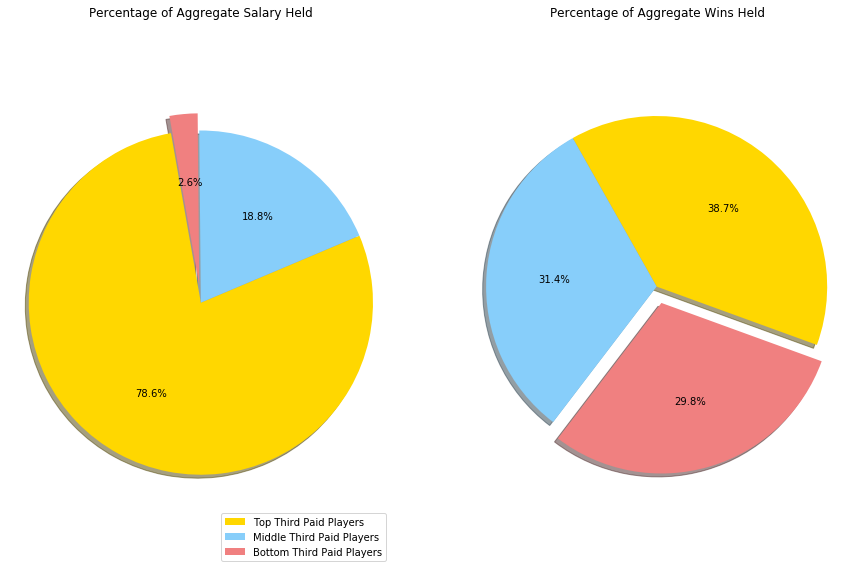

In [52]:
labels = 'Top Third Paid Players', 'Middle Third Paid Players', 'Bottom Third Paid Players'
sizes1 = [topThird_tot_sal, midThird_tot_sal, botThird_tot_sal]
colors = ['gold', 'lightskyblue', 'lightcoral']
sizes2 = [topThird_wins, midThird_wins, botThird_wins]
explode = (0, 0, 0.1)

plt.figure(figsize=(15, 10))
plt.legend(labels, loc = 4)
fig1 = plt.subplot(1, 2, 1)
plt.pie(sizes1, explode=explode, colors=colors, autopct='%1.1f%%',shadow=True, startangle=100)
plt.axis('equal')
plt.title('Percentage of Aggregate Salary Held')
plt.legend(labels, loc = 4)

plt.subplot(1, 2, 2)
plt.pie(sizes2, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=340)
plt.axis('equal')
plt.title('Percentage of Aggregate Wins Held')

plt.show()

The pie charts above are a clear representation of what we explained in the numbers above. The Bottom Third salaries are exploded for emphasis that they hold just 2.6% of the total salary in play; however, they hold 29.8% of the wins. This is just 9% under the Top Third salaries that hold an enormous 78.6%!

# Conclusion and Further Research

All in all, this has been an analysis of how teams are spending their money on players' salary against how many games they won in the 2016. First, we overviewed the teams salaries vs. the teams wins and saw a fair positive correlation between the two. Next, we proved that wins are actually indicative of their performance on the field. We accomplished this by running two important pitching statistics, ERA and SO, against the pitching wins. We received a fair negative correlation between ERA and wins, and a strong positive correlation between SO and wins. Next, we ran pitching wins against pitching salaries and saw little to no correlation at all between the two. Then, we viewed the average money spent per wins for three groups of pitchers: Top Third Salary Holders, Middle Third Salary Holders, and Bottom Third Salary Holders. We saw that the Top Third seemed to be overpaid for their contributions to the win column. Lastly, we viewed the percentage of wins held by each group against the percentage of the total salary held by each group. 

An important path of further research after this analysis would be to answer the question "Why are teams spending so much money on these players"? Traveling down this path may take us to look at how much draw a player has on the fans. Look at revenues, ticket sales, ect. based on players and when they were playing. I would imagine teams are paying these players this much money for a reason. 

Another important path could be analyzing the batters for each team as well and comparing the wins for statistical analysis as well. 